In [4]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd

In [24]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []


for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | LHR T5 BA Gold Wing worked wel...
1,Not Verified | Very good service on this rout...
2,✅ Trip Verified | Flight mainly let down by ...
3,✅ Trip Verified | Another awful experience b...
4,"✅ Trip Verified | The service was rude, full..."


In [9]:
df.to_csv("British Airways.csv")

In [13]:
print(df)

                                               reviews
0    Not Verified |  LHR T5 BA Gold Wing worked wel...
1    Not Verified |  Very good service on this rout...
2    ✅ Trip Verified |   Flight mainly let down by ...
3    ✅ Trip Verified |   Another awful experience b...
4    ✅ Trip Verified |   The service was rude, full...
..                                                 ...
995  ✅ Trip Verified |  London to Gothenburg. BA ar...
996  ✅ Trip Verified |  Orlando to Gatwick. Terribl...
997  ✅ Trip Verified | Mahe to Stockholm via London...
998  ✅ Trip Verified |  Glasgow to Tampa via Gatwic...
999  Not Verified |  Orlando to Gatwick. Travelling...

[1000 rows x 1 columns]


In [14]:
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('British Airways.csv')

In [17]:
print(df.head)  
print(df.columns)

<bound method NDFrame.head of      Unnamed: 0                                            reviews
0             0  Not Verified |  LHR T5 BA Gold Wing worked wel...
1             1  Not Verified |  Very good service on this rout...
2             2  ✅ Trip Verified |   Flight mainly let down by ...
3             3  ✅ Trip Verified |   Another awful experience b...
4             4  ✅ Trip Verified |   The service was rude, full...
..          ...                                                ...
995         995  ✅ Trip Verified |  London to Gothenburg. BA ar...
996         996  ✅ Trip Verified |  Orlando to Gatwick. Terribl...
997         997  ✅ Trip Verified | Mahe to Stockholm via London...
998         998  ✅ Trip Verified |  Glasgow to Tampa via Gatwic...
999         999  Not Verified |  Orlando to Gatwick. Travelling...

[1000 rows x 2 columns]>
Index(['Unnamed: 0', 'reviews'], dtype='object')


In [19]:
print(df.columns)

Index(['Unnamed: 0', 'reviews'], dtype='object')


In [27]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data (run this once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('British Airways.csv')

# Preprocess the text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return filtered_tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import string

# Load your dataset
df = pd.read_csv('British Airways.csv')

# Preprocessing function to clean and tokenize text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize into words
    tokens = word_tokenize(text)
    # Remove stopwords (common words like "the", "and")
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to the "review" column
df['processed_review'] = df['reviews'].dropna().apply(preprocess_text)

# Flatten the list of tokens for all reviews
all_words = [word for tokens in df['processed_review'] for word in tokens]

# Calculate word frequencies
word_freq = Counter(all_words)

# Display the most common words
most_common_words = word_freq.most_common(20)
print("Most common words:", most_common_words)


Most common words: [('flight', 1994), ('ba', 1303), ('verified', 1003), ('trip', 855), ('✅', 741), ('service', 739), ('’', 633), ('time', 542), ('crew', 457), ('london', 452), ('british', 447), ('seat', 443), ('us', 437), ('food', 434), ('class', 430), ('good', 428), ('one', 426), ('airways', 426), ('would', 408), ('business', 405)]


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


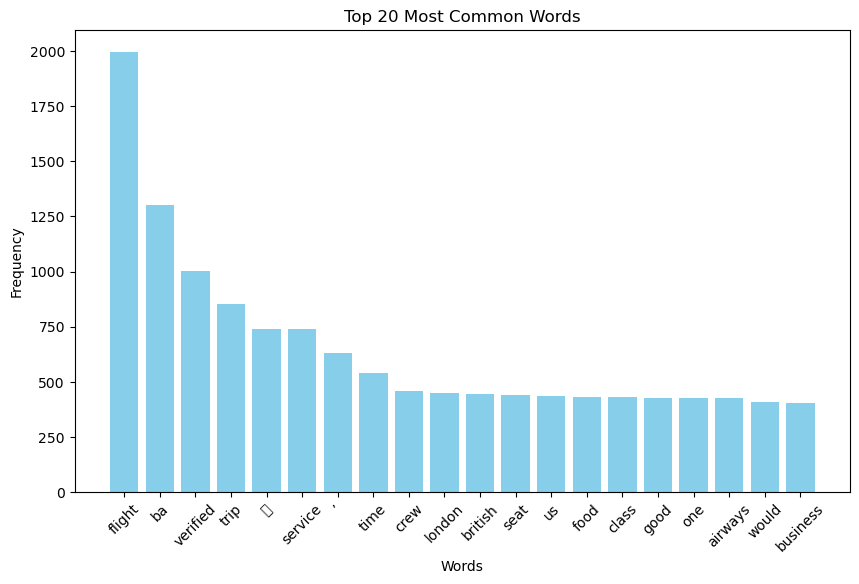

In [33]:
import matplotlib.pyplot as plt

# Extract words and their frequencies
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 217.9 kB/s eta 0:00:02
   ------ -------------------------------- 51.2/299.9 kB 375.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/299.9 kB 798.9 kB/s eta 0:00:01
   -------------------------------- ------- 245.8/299.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.1 MB/s eta 0:00:00


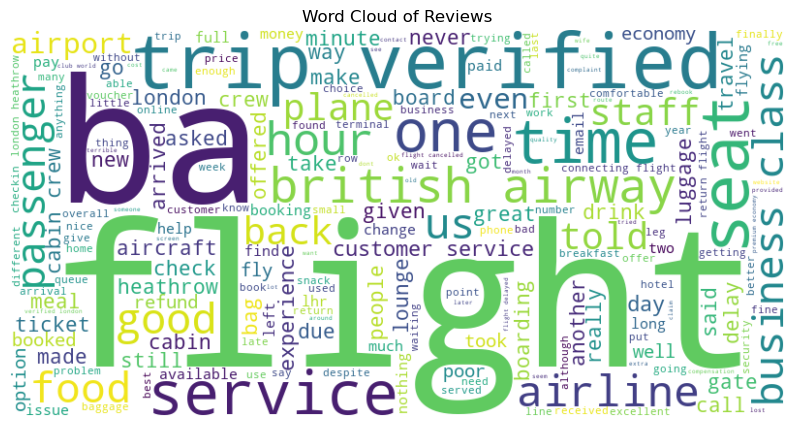

In [36]:
!pip install wordcloud

from wordcloud import WordCloud

# Combine all words into a single string
text_combined = ' '.join(all_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Visualize the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud of Reviews')
plt.show()


In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER data (run this once)
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment for each review
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Compound score indicates overall sentiment

df['sentiment_score'] = df['reviews'].dropna().apply(get_sentiment)

# Classify sentiment as positive, negative, or neutral
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

print(df[['reviews', 'sentiment_score', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             reviews  sentiment_score  \
0  Not Verified |  LHR T5 BA Gold Wing worked wel...           0.9950   
1  Not Verified |  Very good service on this rout...          -0.9119   
2  ✅ Trip Verified |   Flight mainly let down by ...          -0.8845   
3  ✅ Trip Verified |   Another awful experience b...          -0.8294   
4  ✅ Trip Verified |   The service was rude, full...          -0.4588   

  sentiment  
0  positive  
1  negative  
2  negative  
3  negative  
4  negative  


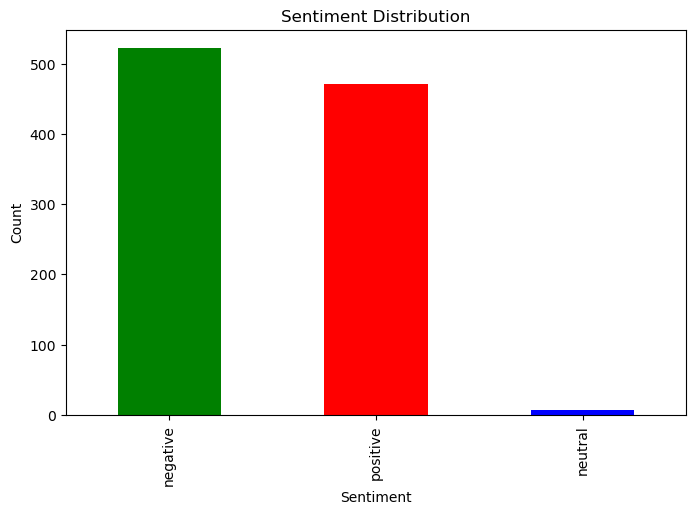

In [40]:
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'], figsize=(8, 5))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# Create bigrams (2-word combinations)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df['reviews'].dropna())

# Get bigram frequencies
bigram_freq = X.toarray().sum(axis=0)
bigrams = vectorizer.get_feature_names_out()

# Create a DataFrame for visualization
bigram_df = pd.DataFrame({'bigram': bigrams, 'frequency': bigram_freq}).sort_values(by='frequency', ascending=False)

print(bigram_df.head(10))


                  bigram  frequency
50201      trip verified        741
8122     british airways        413
8374      business class        309
13731   customer service        217
8563          cabin crew        182
12302  connecting flight         88
40998      return flight         85
29762    london heathrow         74
20212   flight cancelled         72
20286     flight delayed         68


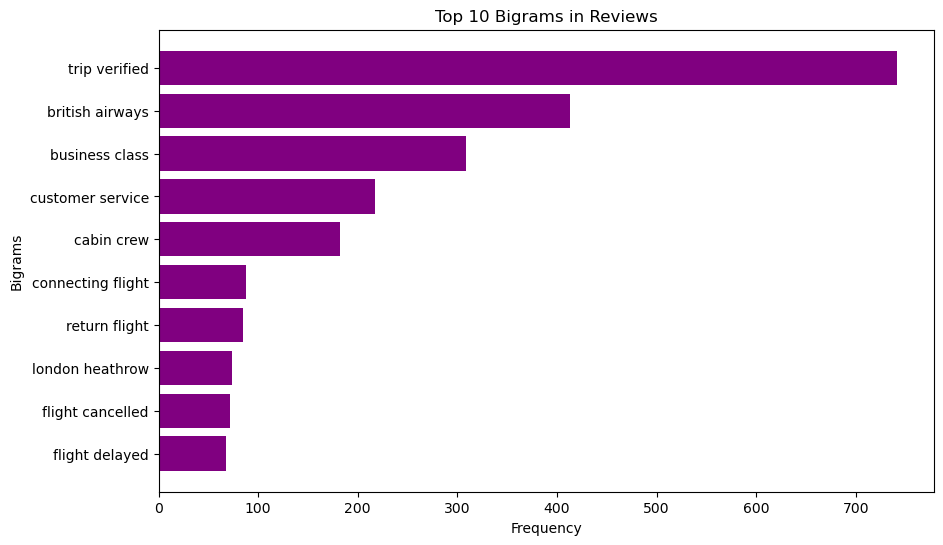

In [43]:
top_bigrams = bigram_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_bigrams['bigram'], top_bigrams['frequency'], color='purple')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 10 Bigrams in Reviews')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
